In [1]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['font.size'] = 22

### Series

Imagine you have a list my_high_scores = [3, 24, 5]

In [3]:
my_high_scores = [3, 24, 5]
my_high_scores

[3, 24, 5]

In [5]:
import pandas as pd

s = pd.Series(my_high_scores)
s

0     3
1    24
2     5
dtype: int64

We get a type and an index

In [6]:
s?

In [9]:
# Accessing elements
# s[0], s[1:]
s[1:]

1    24
2     5
dtype: int64

In [10]:
s.name = "High Scores"
s

0     3
1    24
2     5
Name: High Scores, dtype: int64

The index

In [11]:
levels = [
    "Underground",
    "Athletic",
    "Castle"
]
levels

['Underground', 'Athletic', 'Castle']

In [12]:
s.index = levels
s

Underground     3
Athletic       24
Castle          5
Name: High Scores, dtype: int64

In [17]:
s[0]
s.iloc[1]
s

Underground     3
Athletic       24
Castle          5
Name: High Scores, dtype: int64

In [18]:
high_scores = {
    "Underground": 3,
    "Athletic": 24,
    "Castle": 5
}
pd.Series(high_scores)

Underground     3
Athletic       24
Castle          5
dtype: int64

Analysis

In [19]:
s.sum(), s.mean(), s.std()

(32, 10.666666666666666, 11.590225767142474)

In [20]:
s.min(), s.argmin(), s.idxmin()

(3, 0, 'Underground')

Mathematical operations

In [21]:
s2 = s - 1
s2

Underground     2
Athletic       23
Castle          4
Name: High Scores, dtype: int64

In [22]:
s3 = s / s2
s3

Underground    1.500000
Athletic       1.043478
Castle         1.250000
Name: High Scores, dtype: float64

In [24]:
# what if index does't match?

s / pd.Series([3], index=["Underground"])

Athletic       NaN
Castle         NaN
Underground    1.0
dtype: float64

Visualization

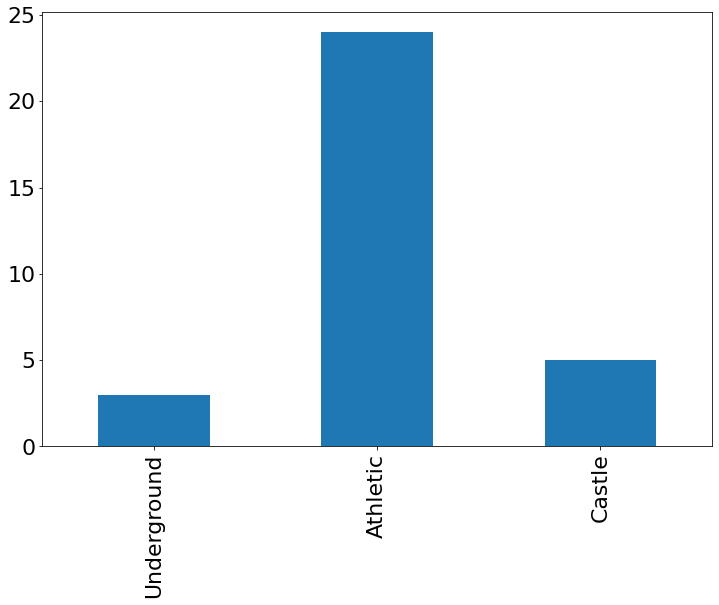

In [28]:
s.plot(kind="bar");
# try bar plot

DataFrame

In [29]:
high_scores = {
    "Me": my_high_scores,
    "James": [3, 52, 63]
}
df = pd.DataFrame(high_scores, index=levels)
df

,Me,James
Underground,3,3
Athletic,24,52
Castle,5,63


In [30]:
pd.DataFrame?
df?
# numpy under the hood

info, describe

In [36]:
df.tail()

,Me,James
count,3.000000,3.000000
mean,10.666667,39.333333
std,11.590226,31.942657
min,3.000000,3.000000
25%,4.000000,27.500000
50%,5.000000,52.000000
75%,14.500000,57.500000
max,24.000000,63.000000


In [38]:
df.max()
# returns a Series!

63

In [39]:
df.cumsum()

,Me,James
Underground,3,3
Athletic,27,55
Castle,32,118


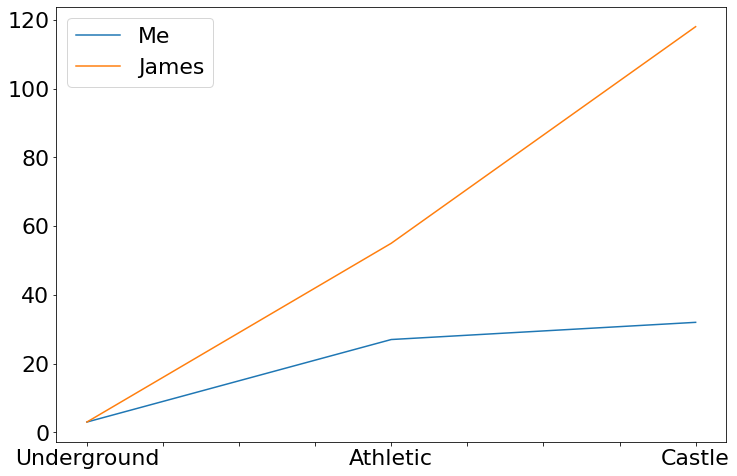

In [42]:
# Are we plotting super mario coins?
#df.plot(kind="bar");
df.cumsum().plot();
# Try plotting cumsum!

## Copy high scores from [speedrun.com](https://www.speedrun.com/sm64#120_Star)

In [43]:
df = pd.read_excel("~/Desktop/supermario64_120stars.xlsx")
df.head()

,Position,Player,Time,Platform,Verified,Date,Unnamed: 6
0,1,Liam,1h 38m 13s,N64,Yes,2 weeks ago,https://www.speedrun.com/sm64/run/z1x9orwm
1,2,batora,1h 38m 21s,N64,Yes,6 months ago,https://www.speedrun.com/sm64/run/yo7v39jm
2,3,cheese,1h 38m 25s,N64,Yes,8 months ago,https://www.speedrun.com/sm64/run/m3ng526y
3,4,simply,1h 38m 28s,N64,Yes,1 year ago,https://www.speedrun.com/sm64/run/yjlxg97z
4,5,puncayshun,1h 38m 32s,N64,Yes,7 months ago,https://www.speedrun.com/sm64/run/m7836jwz


In [44]:
df = pd.read_excel("~/Desktop/supermario64_120stars.xlsx", usecols="A:F", index_col=0)
df.head()

,Player,Time,Platform,Verified,Date
Position,,,,,
1,Liam,1h 38m 13s,N64,Yes,2 weeks ago
2,batora,1h 38m 21s,N64,Yes,6 months ago
3,cheese,1h 38m 25s,N64,Yes,8 months ago
4,simply,1h 38m 28s,N64,Yes,1 year ago
5,puncayshun,1h 38m 32s,N64,Yes,7 months ago


Getting familiar with our df:

In [45]:
# df.tail()
# df.shape
# df.info()
# df.describe()
df.shape

(418, 5)

### Boolean indexing

In [48]:
#df.Verified
df[["Verified"]]

,Verified
Position,
1,Yes
2,Yes
3,Yes
4,Yes
5,Yes
...,...
414,Yes
415,Yes
416,Yes


In [50]:
df.Verified != "Yes"
df[df.Verified != "Yes"]

,Player,Time,Platform,Verified,Date
Position,,,,,
66,luke994,1h 44m 56s,N64,No,6 years ago
79,Hampern,1h 45m 52s,N64,No,7 years ago
100,Hirabomb,1h 47m 16s,N64,No,6 years ago
121,Balls Out,1h 48m 58s,N64,No,7 years ago
124,sicko,1h 49m 27s,N64,No,7 years ago
126,Washeyy,1h 49m 33s,N64,No,6 years ago
144,Sasurainopū,1h 49m 58s,N64,No,NaN
164,Seanzy,1h 52m 12s,N64,No,7 years ago
168,Shigeru,1h 52m 40s,N64,No,10 years ago


## [pd.DataFrame.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

`func = lambda col: col*2`

`df.apply(func, axis=1)`


In [51]:
# look at the Date column
df["Date"].head()

Position
1     2 weeks ago
2    6 months ago
3    8 months ago
4      1 year ago
5    7 months ago
Name: Date, dtype: object

In [53]:
# https://stackoverflow.com/questions/28268818/how-to-find-the-date-n-days-ago-in-python

import datetime
from dateutil.relativedelta import relativedelta

def get_past_date(str_days_ago):
    TODAY = datetime.date.today()
    splitted = str_days_ago.split()
    if len(splitted) == 1 and splitted[0].lower() == 'today':
        return str(TODAY.isoformat())
    elif len(splitted) == 1 and splitted[0].lower() == 'yesterday':
        date = TODAY - relativedelta(days=1)
        return str(date.isoformat())
    elif splitted[1].lower() in ['hour', 'hours', 'hr', 'hrs', 'h']:
        date = datetime.datetime.now() - relativedelta(hours=int(splitted[0]))
        return str(date.date().isoformat())
    elif splitted[1].lower() in ['day', 'days', 'd']:
        date = TODAY - relativedelta(days=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['wk', 'wks', 'week', 'weeks', 'w']:
        date = TODAY - relativedelta(weeks=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['mon', 'mons', 'month', 'months', 'm']:
        date = TODAY - relativedelta(months=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['yrs', 'yr', 'years', 'year', 'y']:
        date = TODAY - relativedelta(years=int(splitted[0]))
        return str(date.isoformat())
    else:
        return "Wrong Argument format"


In [55]:
# apply get_past_date to date
#dates = df.Date.apply(get_past_date)
df.dtypes

Player      object
Time        object
Platform    object
Verified    object
Date        object
dtype: object

- pd.DataFrame.isna()
- pd.DataFrame.dropna()

In [58]:
df.Date.isna().any()
#df.Date.isna().any()
df.loc[df.Date.isna()]

,Player,Time,Platform,Verified,Date
Position,,,,,
144,Sasurainopū,1h 49m 58s,N64,No,NaN
185,Seseragi,1h 54m 19s,N64,No,NaN
238,All,1h 59m 59s,N64,No,NaN
240,Kazushi-Bomber,2h 00m 59s,N64,No,NaN
292,Moewe,2h 16m 34s,N64,No,NaN
293,taka12352,2h 17m 12s,N64,No,NaN
299,okamoto,2h 19m 06s,N64,No,NaN
317,Maru,2h 25m 46s,N64,No,NaN
318,kirsche.,2h 26m 56s,N64,No,NaN


Ignore NaN values

In [62]:
dates_notna = df.Date.dropna().apply(get_past_date)
dates_notna.head(10)
df.head(10)

,Player,Time,Platform,Verified,Date
Position,,,,,
1,Liam,1h 38m 13s,N64,Yes,2 weeks ago
2,batora,1h 38m 21s,N64,Yes,6 months ago
3,cheese,1h 38m 25s,N64,Yes,8 months ago
4,simply,1h 38m 28s,N64,Yes,1 year ago
5,puncayshun,1h 38m 32s,N64,Yes,7 months ago
6,hokorobi,1h 38m 54s,N64,Yes,8 months ago
6,Taggo,1h 38m 54s,N64,Yes,3 months ago
8,Karin,1h 39m 00s,N64,Yes,3 months ago
8,Paracusia,1h 39m 00s,N64,Yes,1 month ago


In [60]:
df["date"] = dates_notna

ValueError: cannot reindex from a duplicate axis

The index is not unique!

In [ ]:
df.head(10)

In [65]:
#df.reset_index(inplace=True)
df = df.reset_index()
#df.head()

In [66]:
# mention drop_duplicates
#dates = df.Date[df.Date.notna()].apply(get_past_date)
dates_notna = df.Date.dropna().apply(get_past_date)
dates_notna.head(8)

0    2021-10-13
1    2021-04-27
2    2021-02-27
3    2020-10-27
4    2021-03-27
5    2021-02-27
6    2021-07-27
7    2021-07-27
Name: Date, dtype: object

In [67]:
df["date"] = dates_notna
df.head(8)

,Position,Player,Time,Platform,Verified,Date,date
0,1,Liam,1h 38m 13s,N64,Yes,2 weeks ago,2021-10-13
1,2,batora,1h 38m 21s,N64,Yes,6 months ago,2021-04-27
2,3,cheese,1h 38m 25s,N64,Yes,8 months ago,2021-02-27
3,4,simply,1h 38m 28s,N64,Yes,1 year ago,2020-10-27
4,5,puncayshun,1h 38m 32s,N64,Yes,7 months ago,2021-03-27
5,6,hokorobi,1h 38m 54s,N64,Yes,8 months ago,2021-02-27
6,6,Taggo,1h 38m 54s,N64,Yes,3 months ago,2021-07-27
7,8,Karin,1h 39m 00s,N64,Yes,3 months ago,2021-07-27


## dtypes

'2021-10-13'

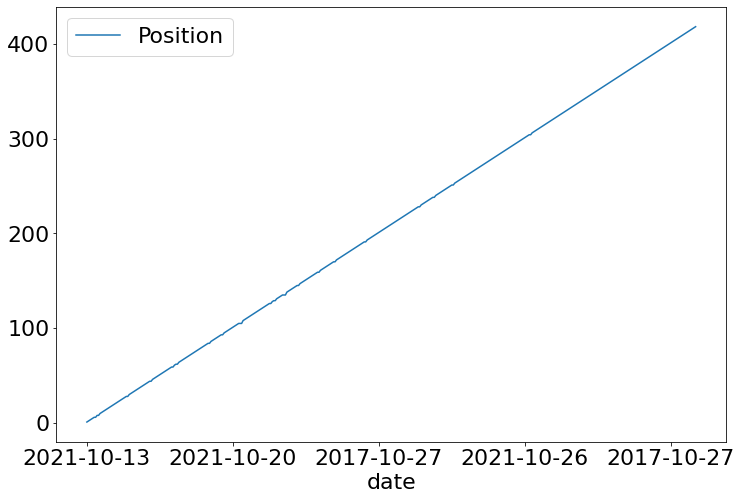

In [71]:
df.plot(x="date", y="Position");
df.date[0]

In [ ]:
df.dtypes

### Dtype Conversion

- pd.to_datetime
- pd.to_timestamp
- pd.to_numeric
- pd.to_timedelta
- pd.DataFrame.astype


In [72]:
pd.to_datetime(df["date"])

0     2021-10-13
1     2021-04-27
2     2021-02-27
3     2020-10-27
4     2021-03-27
         ...    
413   2020-10-27
414   2016-10-27
415   2021-07-27
416   2020-10-27
417   2015-10-27
Name: date, Length: 418, dtype: datetime64[ns]

In [73]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes

Position             int64
Player              object
Time                object
Platform            object
Verified            object
Date                object
date        datetime64[ns]
dtype: object

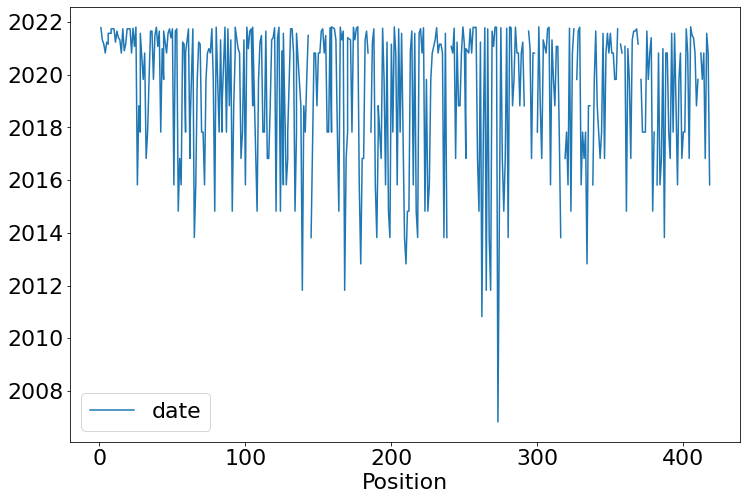

In [74]:
df.plot(x="Position", y="date");

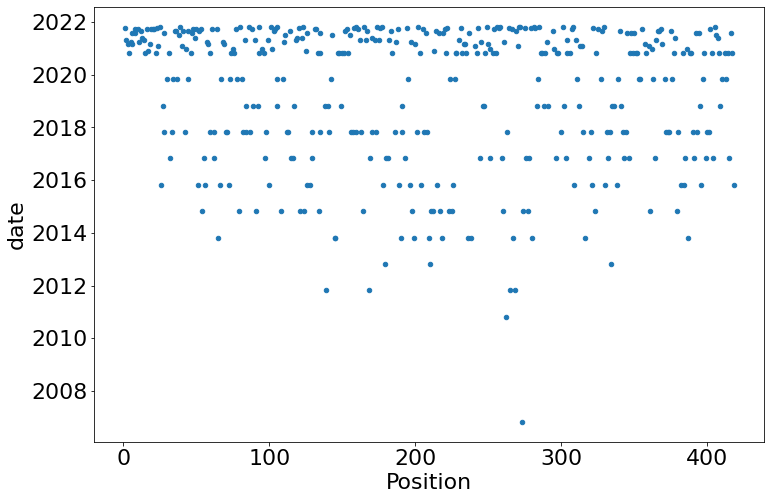

In [75]:
df.plot.scatter(x="Position", y="date");

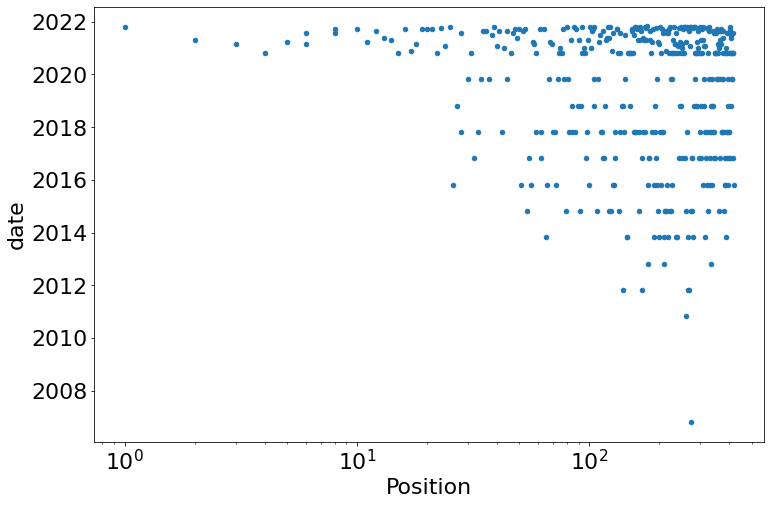

In [76]:
df.plot.scatter(x="Position", y="date", logx=True);

In [ ]:
# ignore?
df["Platform"].unique()

- df.value.str


In [77]:
df.Time[df.Time.str.contains("13")]

0      1h 38m 13s
20     1h 41m 13s
27     1h 42m 13s
28     1h 42m 13s
148    1h 50m 13s
175    1h 53m 13s
215    1h 58m 13s
225    1h 59m 13s
279    2h 13m 03s
280    2h 13m 32s
375    3h 12m 13s
401    4h 13m 16s
402    4h 13m 24s
Name: Time, dtype: object

In [79]:
time = df.Time.str.extract(r'(?P<hours>\d+)h (?P<minutes>\d+)m (?P<seconds>\d+)s')

time["hours"] = pd.to_numeric(time["hours"])
time["minutes"] = pd.to_numeric(time["minutes"])
time["seconds"] = pd.to_numeric(time["seconds"])
time.head()


,hours,minutes,seconds
0,1,38,13
1,1,38,21
2,1,38,25
3,1,38,28
4,1,38,32


In [80]:
seconds = time.hours*3600 + time.minutes*60 + time.seconds
df["seconds"] = seconds
df.head()

,Position,Player,Time,Platform,Verified,Date,date,seconds
0,1,Liam,1h 38m 13s,N64,Yes,2 weeks ago,2021-10-13,5893
1,2,batora,1h 38m 21s,N64,Yes,6 months ago,2021-04-27,5901
2,3,cheese,1h 38m 25s,N64,Yes,8 months ago,2021-02-27,5905
3,4,simply,1h 38m 28s,N64,Yes,1 year ago,2020-10-27,5908
4,5,puncayshun,1h 38m 32s,N64,Yes,7 months ago,2021-03-27,5912


In [81]:
# we could also convert seconds to timedelta

pd.to_timedelta(df["seconds"], unit="s")

0     0 days 01:38:13
1     0 days 01:38:21
2     0 days 01:38:25
3     0 days 01:38:28
4     0 days 01:38:32
            ...      
413   0 days 05:54:57
414   0 days 05:59:18
415   0 days 09:11:54
416   0 days 10:40:40
417   0 days 16:32:42
Name: seconds, Length: 418, dtype: timedelta64[ns]

## Column slicing

In [82]:
df.loc[:, ["Position", "Player", "Verified", "date", "seconds"]]

,Position,Player,Verified,date,seconds
0,1,Liam,Yes,2021-10-13,5893
1,2,batora,Yes,2021-04-27,5901
2,3,cheese,Yes,2021-02-27,5905
3,4,simply,Yes,2020-10-27,5908
4,5,puncayshun,Yes,2021-03-27,5912
...,...,...,...,...,...
413,414,GTAce99,Yes,2020-10-27,21297
414,415,DanimalSounds,Yes,2016-10-27,21558
415,416,Latsu7,Yes,2021-07-27,33114
416,417,kam4ran,Yes,2020-10-27,38440


In [83]:
df = df.loc[:, ["Position", "Player", "Verified", "date", "seconds"]]
df

,Position,Player,Verified,date,seconds
0,1,Liam,Yes,2021-10-13,5893
1,2,batora,Yes,2021-04-27,5901
2,3,cheese,Yes,2021-02-27,5905
3,4,simply,Yes,2020-10-27,5908
4,5,puncayshun,Yes,2021-03-27,5912
...,...,...,...,...,...
413,414,GTAce99,Yes,2020-10-27,21297
414,415,DanimalSounds,Yes,2016-10-27,21558
415,416,Latsu7,Yes,2021-07-27,33114
416,417,kam4ran,Yes,2020-10-27,38440


## groupby

In [84]:
df["playerlen"] = df["Player"].str.len()
df

,Position,Player,Verified,date,seconds,playerlen
0,1,Liam,Yes,2021-10-13,5893,4
1,2,batora,Yes,2021-04-27,5901,6
2,3,cheese,Yes,2021-02-27,5905,6
3,4,simply,Yes,2020-10-27,5908,6
4,5,puncayshun,Yes,2021-03-27,5912,10
...,...,...,...,...,...,...
413,414,GTAce99,Yes,2020-10-27,21297,7
414,415,DanimalSounds,Yes,2016-10-27,21558,13
415,416,Latsu7,Yes,2021-07-27,33114,6
416,417,kam4ran,Yes,2020-10-27,38440,7


In [85]:
groups = df.groupby("playerlen")
groups

In [86]:
playerlen, group = groups.__iter__().__next__()
group

,Position,Player,Verified,date,seconds,playerlen
223,224,IR,Yes,2019-10-27,7140,2
411,412,32,Yes,2020-10-27,20981,2


In [87]:
for (playerlen, df_group) in groups:
    print(f"{len(df_group)} players have {playerlen} letters")

2 players have 2 letters
10 players have 3 letters
35 players have 4 letters
45 players have 5 letters
53 players have 6 letters
51 players have 7 letters
52 players have 8 letters
50 players have 9 letters
30 players have 10 letters
28 players have 11 letters
21 players have 12 letters
15 players have 13 letters
11 players have 14 letters
6 players have 15 letters
4 players have 16 letters
4 players have 17 letters
1 players have 18 letters


In [88]:
groups.mean()

,Position,seconds
playerlen,,
2,318.000000,14060.500000
3,251.600000,8108.600000
4,195.885714,7584.400000
5,191.088889,7609.111111
6,182.924528,7990.490566
7,213.450980,8977.235294
8,199.519231,7917.884615
9,197.800000,8736.860000
10,197.633333,7546.600000


- value_counts
- sort_index, sort_values

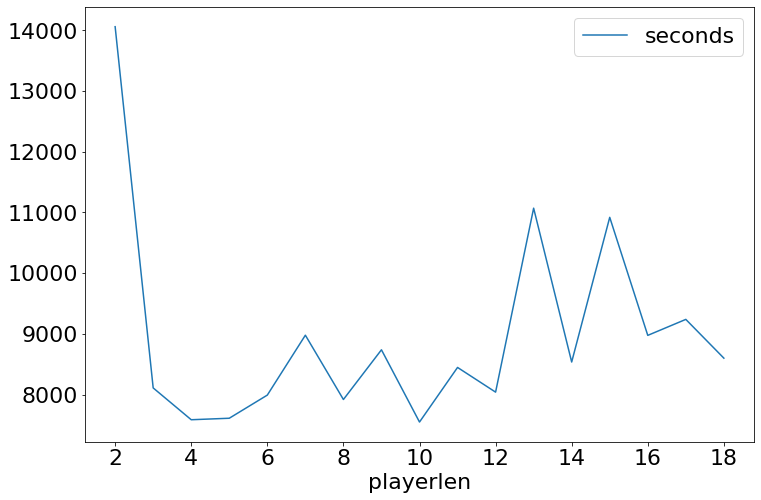

In [90]:
df.groupby("playerlen").mean().plot(y="seconds");

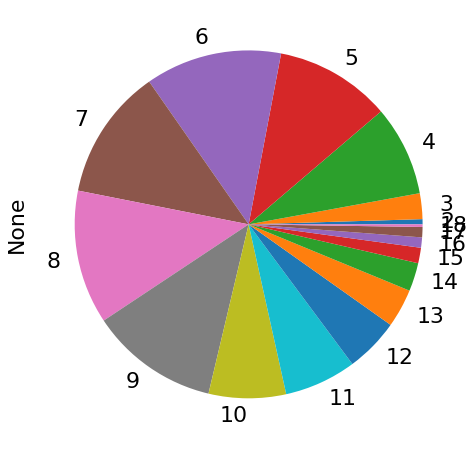

In [94]:
# sort_index, sort_value
df.value_counts("playerlen").sort_index().plot(kind="pie");

![opt](images/pandas_optimization.jpg)

![opt3](images/pandas_dask_pyspark.png)

### End of slides